In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
time_df = pd.read_csv("time_bin_info.csv")
time_df.head()

,TimeStamp,TimeBin,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,...,Neuron92,Neuron93,Neuron94,x_position,y_position,x_velocity,y_velocity,x_acceleration,y_acceleration,TargetOn
0,23.79,1,0,0,0,0,0,0,0,0,...,0,0,0,-3.528073,1.246197,-0.058506,-0.091257,-27.356562,-17.469933,0
1,23.80,2,0,0,0,0,0,0,0,0,...,0,0,0,-3.528866,1.245791,-0.022758,0.039102,23.217614,13.524994,0
2,23.81,3,0,0,0,0,0,0,0,0,...,0,0,0,-3.528202,1.245970,0.080537,-0.041023,-12.605531,-10.911118,0
3,23.82,4,0,0,0,0,0,0,0,0,...,0,0,0,-3.528681,1.245885,-0.140814,0.072169,-6.628672,17.104540,0
4,23.83,5,0,0,0,0,0,0,0,0,...,1,0,0,-3.528435,1.245922,0.280550,-0.193932,67.613019,-62.822279,0


In [3]:
time_df.describe()

,TimeStamp,TimeBin,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,...,Neuron92,Neuron93,Neuron94,x_position,y_position,x_velocity,y_velocity,x_acceleration,y_acceleration,TargetOn
count,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,...,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000
mean,537.525407,61.832078,0.031251,0.009474,0.017693,0.005892,0.056326,0.023350,0.034616,0.019701,...,0.033795,0.016186,0.020605,-2.220139,1.602596,0.226046,0.214150,-0.125598,-0.388182,0.008302
std,282.069265,36.683712,0.176480,0.098416,0.133223,0.077835,0.238193,0.153325,0.184265,0.139814,...,0.182913,0.126986,0.146812,4.023312,4.139117,6.595670,6.561632,44.399562,51.277240,0.090739
min,23.790000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-12.010817,-6.893995,-25.712475,-28.699107,-485.899661,-250.236862,0.000000
25%,295.932500,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-5.270932,-1.809327,-3.361311,-2.984294,-28.827701,-31.379592,0.000000
50%,550.525000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-2.019185,1.535253,0.140044,-0.011029,0.279343,0.685039,0.000000
75%,764.707500,91.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.914206,4.823238,4.041670,3.223755,28.757748,31.221351,0.000000
max,1027.820000,170.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,7.746613,11.303367,25.642140,30.728159,219.008864,309.034342,1.000000


In [4]:
time_df_clean = time_df.drop(["TimeStamp", "TimeBin", "x_position", "y_position", "TargetOn"], axis=1)
time_df_clean.head()

,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,Neuron9,Neuron10,...,Neuron89,Neuron90,Neuron91,Neuron92,Neuron93,Neuron94,x_velocity,y_velocity,x_acceleration,y_acceleration
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.058506,-0.091257,-27.356562,-17.469933
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,-0.022758,0.039102,23.217614,13.524994
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.080537,-0.041023,-12.605531,-10.911118
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.140814,0.072169,-6.628672,17.104540
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.280550,-0.193932,67.613019,-62.822279


In [5]:
abs_vel = (time_df_clean["x_velocity"].pow(2) + time_df_clean["y_velocity"].pow(2)).pow(0.5)
time_df_clean["abs_velocity"] = abs_vel
time_df_clean.head()

,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,Neuron9,Neuron10,...,Neuron90,Neuron91,Neuron92,Neuron93,Neuron94,x_velocity,y_velocity,x_acceleration,y_acceleration,abs_velocity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-0.058506,-0.091257,-27.356562,-17.469933,0.108401
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-0.022758,0.039102,23.217614,13.524994,0.045242
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.080537,-0.041023,-12.605531,-10.911118,0.090383
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-0.140814,0.072169,-6.628672,17.104540,0.158231
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.280550,-0.193932,67.613019,-62.822279,0.341054


In [6]:
abs_accel = (time_df_clean["x_acceleration"].pow(2) + time_df_clean["y_acceleration"].pow(2)).pow(0.5)
time_df_clean["abs_acceleration"] = abs_accel
time_df_clean.head()

,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,Neuron9,Neuron10,...,Neuron91,Neuron92,Neuron93,Neuron94,x_velocity,y_velocity,x_acceleration,y_acceleration,abs_velocity,abs_acceleration
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.058506,-0.091257,-27.356562,-17.469933,0.108401,32.458898
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.022758,0.039102,23.217614,13.524994,0.045242,26.869743
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.080537,-0.041023,-12.605531,-10.911118,0.090383,16.671890
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.140814,0.072169,-6.628672,17.104540,0.158231,18.344061
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0.280550,-0.193932,67.613019,-62.822279,0.341054,92.293873


In [7]:
time_df_clean.describe()

,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,Neuron9,Neuron10,...,Neuron91,Neuron92,Neuron93,Neuron94,x_velocity,y_velocity,x_acceleration,y_acceleration,abs_velocity,abs_acceleration
count,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,...,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000
mean,0.031251,0.009474,0.017693,0.005892,0.056326,0.023350,0.034616,0.019701,0.044090,0.020739,...,0.040658,0.033795,0.016186,0.020605,0.226046,0.214150,-0.125598,-0.388182,7.488616,58.162533
std,0.176480,0.098416,0.133223,0.077835,0.238193,0.153325,0.184265,0.139814,0.209732,0.146221,...,0.205962,0.182913,0.126986,0.146812,6.595670,6.561632,44.399562,51.277240,5.529424,34.898510
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-25.712475,-28.699107,-485.899661,-250.236862,0.001179,0.049305
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-3.361311,-2.984294,-28.827701,-31.379592,2.998130,31.670225
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.140044,-0.011029,0.279343,0.685039,6.357946,52.827369
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.041670,3.223755,28.757748,31.221351,10.867802,78.708112
max,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,25.642140,30.728159,219.008864,309.034342,35.412962,556.251392


### Feature Engineering and Exploration
Now that the dataset is clean and ready we can look at the data skew, distribution, and how we need to normalize/scale

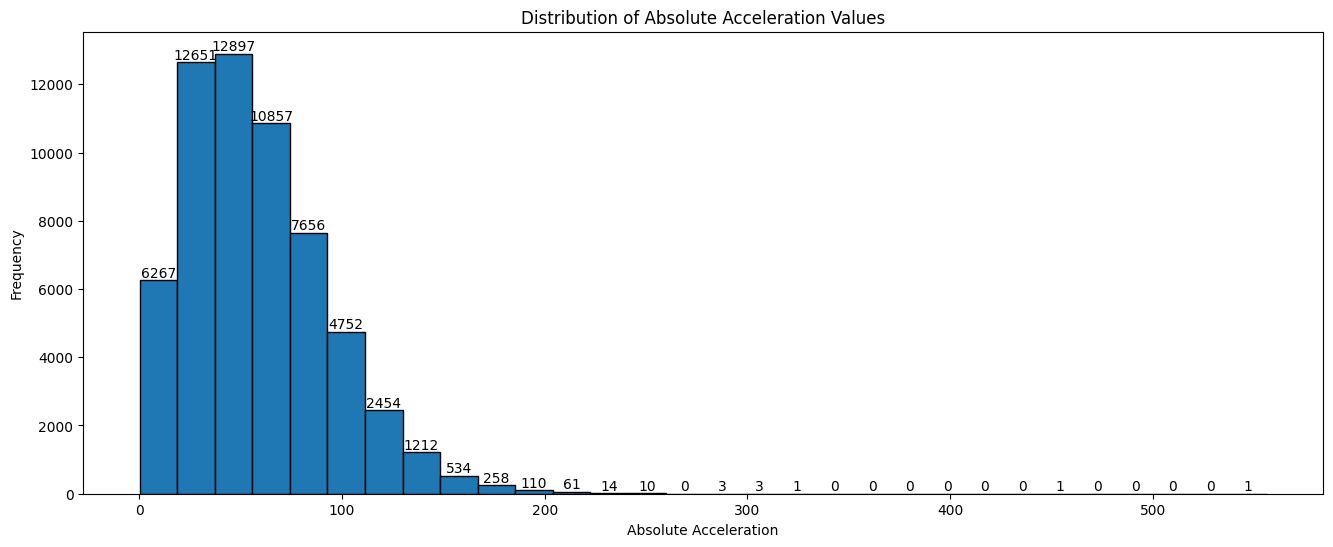

In [24]:
plt.figure(figsize=(16, 6))

counts, bins, patches = plt.hist(time_df_clean["abs_acceleration"], bins=30, edgecolor="black")

# Label each bin with the count
for count, bin_center in zip(counts, 0.5 * (bins[1:] + bins[:-1])):
    plt.text(bin_center, count, int(count), ha='center', va='bottom')

plt.title("Distribution of Absolute Acceleration Values")
plt.ylabel("Frequency")
plt.xlabel("Absolute Acceleration")
plt.show()

Seems to be quite right skewed, lets see if we can put on a different scale

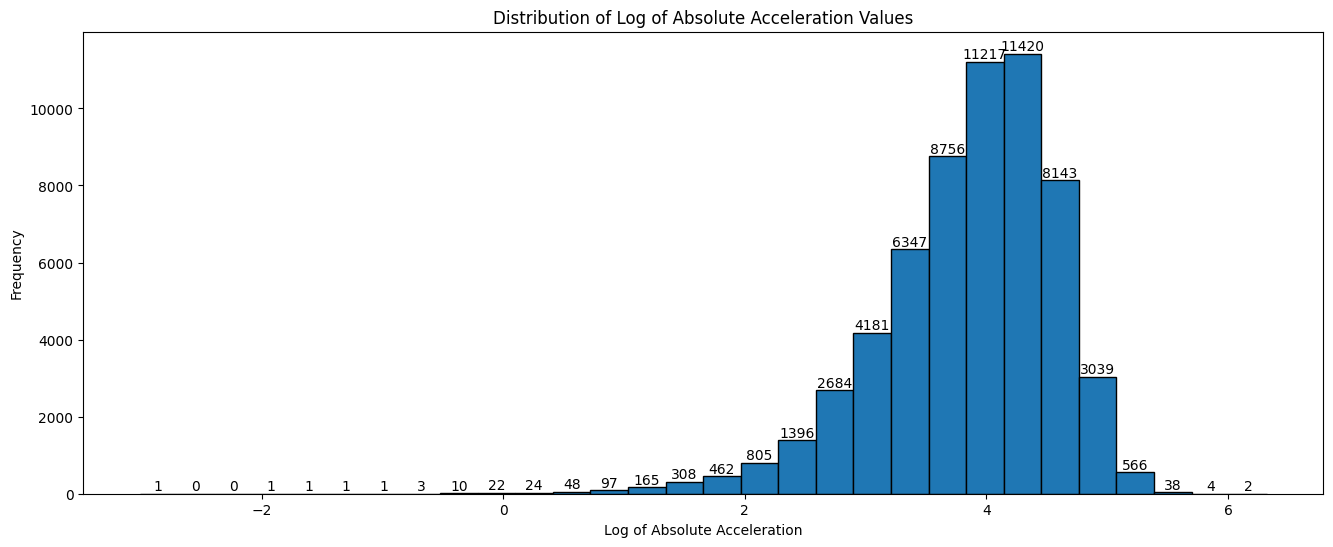

In [23]:
# log scaled

plt.figure(figsize=(16, 6))

counts, bins, patches = plt.hist(np.log(time_df_clean["abs_acceleration"]), bins=30, edgecolor="black")

# Label each bin with the count
for count, bin_center in zip(counts, 0.5 * (bins[1:] + bins[:-1])):
    plt.text(bin_center, count, int(count), ha='center', va='bottom')

plt.title("Distribution of Log of Absolute Acceleration Values")
plt.ylabel("Frequency")
plt.xlabel("Log of Absolute Acceleration")
plt.show()

Now seems a bit right skewed, what if we look at sqrt(accel)

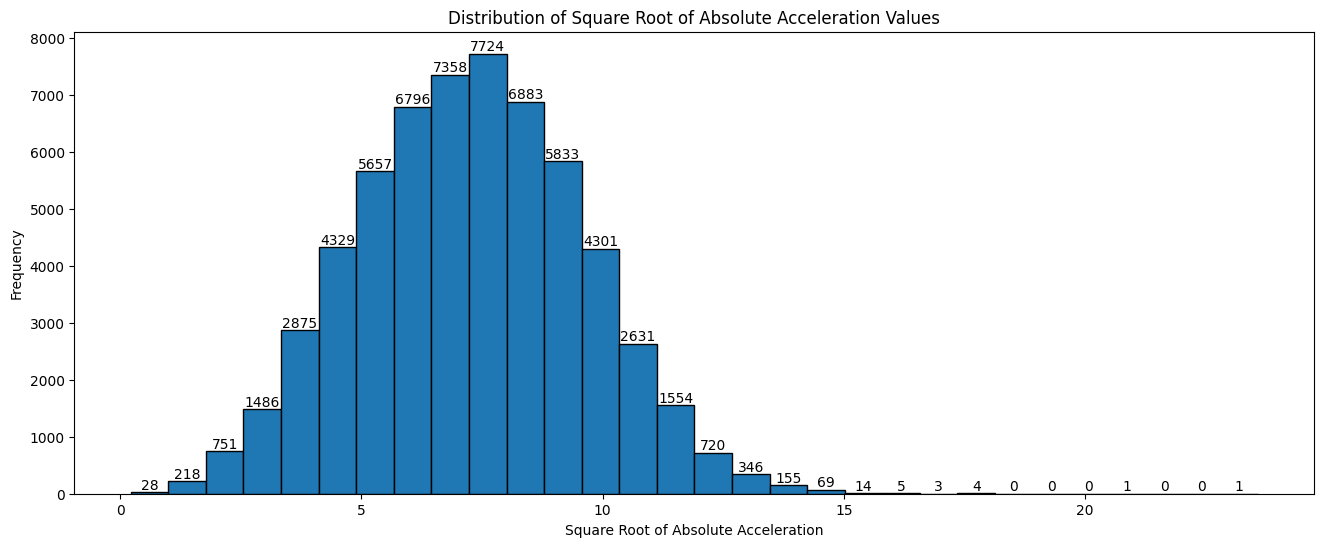

In [25]:
plt.figure(figsize=(16, 6))

counts, bins, patches = plt.hist(np.sqrt(time_df_clean["abs_acceleration"]), bins=30, edgecolor="black")

# Label each bin with the count
for count, bin_center in zip(counts, 0.5 * (bins[1:] + bins[:-1])):
    plt.text(bin_center, count, int(count), ha='center', va='bottom')

plt.title("Distribution of Square Root of Absolute Acceleration Values")
plt.ylabel("Frequency")
plt.xlabel("Square Root of Absolute Acceleration")
plt.show()

Now we will add this to the df and remove outliers outside 3 standard deviations

In [26]:
time_df_clean['sqrt_abs_acceleration'] = np.sqrt(time_df_clean['abs_acceleration'])

In [28]:
mean = time_df_clean['sqrt_abs_acceleration'].mean()
std_dev = time_df_clean['sqrt_abs_acceleration'].std()

# Define the threshold (3 standard deviations from the mean)
lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev
print(f'{lower_bound} to {upper_bound}')

0.3269291342823406 to 14.207283982294545


In [29]:
time_edited_df = time_df_clean[(time_df_clean['sqrt_abs_acceleration'] >= lower_bound) & (time_df_clean['sqrt_abs_acceleration'] <= upper_bound)]

In [32]:
# number of samples removed
len(time_df_clean) - len(time_edited_df)

98

Check distribution now

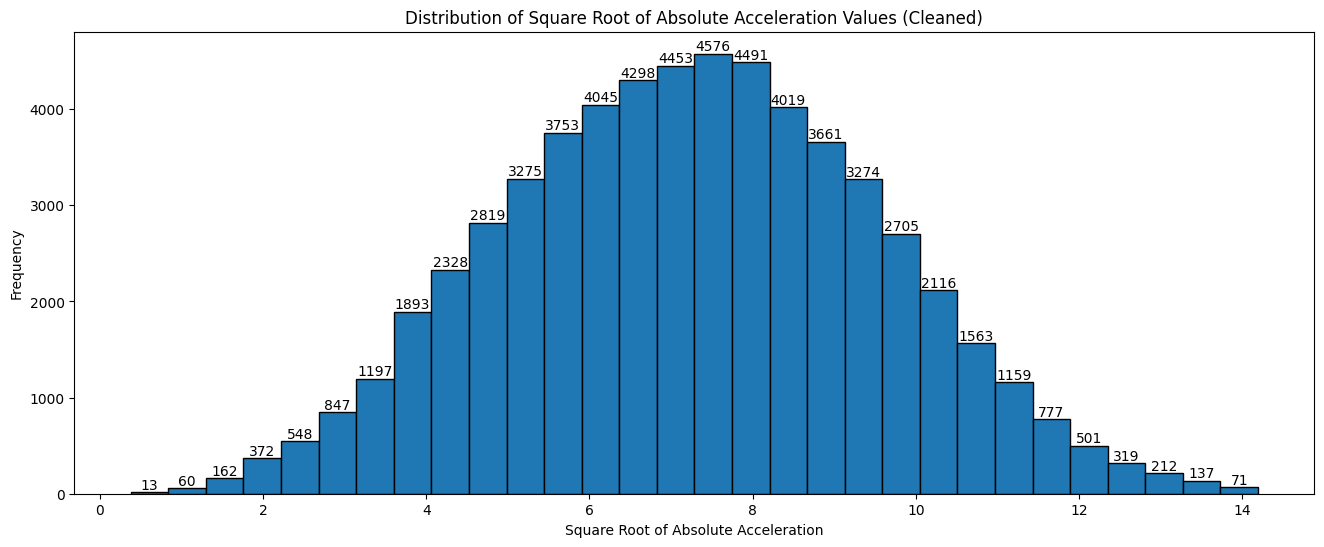

In [34]:
plt.figure(figsize=(16, 6))

counts, bins, patches = plt.hist(time_edited_df["sqrt_abs_acceleration"], bins=30, edgecolor="black")

# Label each bin with the count
for count, bin_center in zip(counts, 0.5 * (bins[1:] + bins[:-1])):
    plt.text(bin_center, count, int(count), ha='center', va='bottom')

plt.title("Distribution of Square Root of Absolute Acceleration Values (Cleaned)")
plt.ylabel("Frequency")
plt.xlabel("Square Root of Absolute Acceleration")
plt.show()

Target is ready! Now we need to scale features. Lets see what values the neurons are taking

In [35]:
neurons = time_edited_df.loc[:, 'Neuron1':'Neuron94']
neurons.head()

,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,Neuron9,Neuron10,...,Neuron85,Neuron86,Neuron87,Neuron88,Neuron89,Neuron90,Neuron91,Neuron92,Neuron93,Neuron94
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [38]:
unique_values = {col: neurons[col].unique().tolist() for col in neurons.columns}
unique_values

{'Neuron1': [0, 1, 2],
 'Neuron2': [0, 1, 2],
 'Neuron3': [0, 1, 2],
 'Neuron4': [0, 1, 2],
 'Neuron5': [0, 1, 2, 3],
 'Neuron6': [0, 1, 2, 3],
 'Neuron7': [0, 1, 2],
 'Neuron8': [0, 1, 2],
 'Neuron9': [0, 1, 2],
 'Neuron10': [0, 1, 2],
 'Neuron11': [0, 1, 2],
 'Neuron12': [1, 0, 2],
 'Neuron13': [0, 1, 2],
 'Neuron14': [1, 0, 2, 3],
 'Neuron15': [0, 2, 1],
 'Neuron16': [0, 1, 2],
 'Neuron17': [0, 1],
 'Neuron18': [0, 1, 2],
 'Neuron19': [0, 1, 2],
 'Neuron20': [0, 1],
 'Neuron21': [0, 1],
 'Neuron22': [0, 1, 2],
 'Neuron23': [0, 1, 2],
 'Neuron24': [0, 1, 2],
 'Neuron25': [0, 1, 2],
 'Neuron26': [0, 1, 2],
 'Neuron27': [0, 1, 2],
 'Neuron28': [0, 1, 2, 3],
 'Neuron29': [0, 1, 2],
 'Neuron30': [0, 1, 2, 3],
 'Neuron31': [0, 2, 1],
 'Neuron32': [1, 0, 2],
 'Neuron33': [0, 1, 2],
 'Neuron34': [0, 1, 2],
 'Neuron35': [0, 2, 1],
 'Neuron36': [0, 1, 2],
 'Neuron37': [0, 1, 2],
 'Neuron38': [0, 2, 1],
 'Neuron39': [0, 1, 2],
 'Neuron40': [0, 1, 2],
 'Neuron41': [0, 1, 2, 3],
 'Neuron42': [0,

In [40]:
from collections import Counter

# Get the lengths of each list in the dictionary
lengths = [len(lst) for lst in unique_values.values()]

# Count occurrences of each length
length_frequencies = Counter(lengths)

# Output the counts for lengths 1 to 4
result = {length: length_frequencies.get(length, 0) for length in range(1, 6)}
print(result)

{1: 1, 2: 5, 3: 64, 4: 23, 5: 1}


Most neurons contain values of 0,1,2,3 but one outlier is never activated, and one outlier has an activation of 4 at one point. (neuron 52 is always 0, neuron 82 has the activation of 4)

I want to scale all neurons the same way, so I'll start with a min-max scaler from 0 to 4.

### Linear Regression

Requires scikit-learn

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
X = time_df_clean.loc[:, 'Neuron1':'Neuron94']
y = time_df_clean['abs_acceleration']

Feature scaling: min-max with min 0, max 4, = (value - 0)/(4-0) = value / 4

In [41]:
X_scaled = X / 4.0

In [47]:
X_scaled.describe()

,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,Neuron9,Neuron10,...,Neuron85,Neuron86,Neuron87,Neuron88,Neuron89,Neuron90,Neuron91,Neuron92,Neuron93,Neuron94
count,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,...,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000,59742.000000
mean,0.007813,0.002369,0.004423,0.001473,0.014081,0.005838,0.008654,0.004925,0.011022,0.005185,...,0.017680,0.008662,0.002946,0.007520,0.026916,0.007152,0.010165,0.008449,0.004047,0.005151
std,0.044120,0.024604,0.033306,0.019459,0.059548,0.038331,0.046066,0.034953,0.052433,0.036555,...,0.064901,0.046853,0.027133,0.043431,0.080170,0.043009,0.051491,0.045728,0.031746,0.036703
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.500000,0.500000,0.500000,0.500000,0.750000,0.750000,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.750000,0.750000,0.750000,0.500000,0.500000,0.500000


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [49]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 1208.4879298723936
Root Mean Squared Error: 34.76331298757921
R^2 Score: 0.006314583784384542


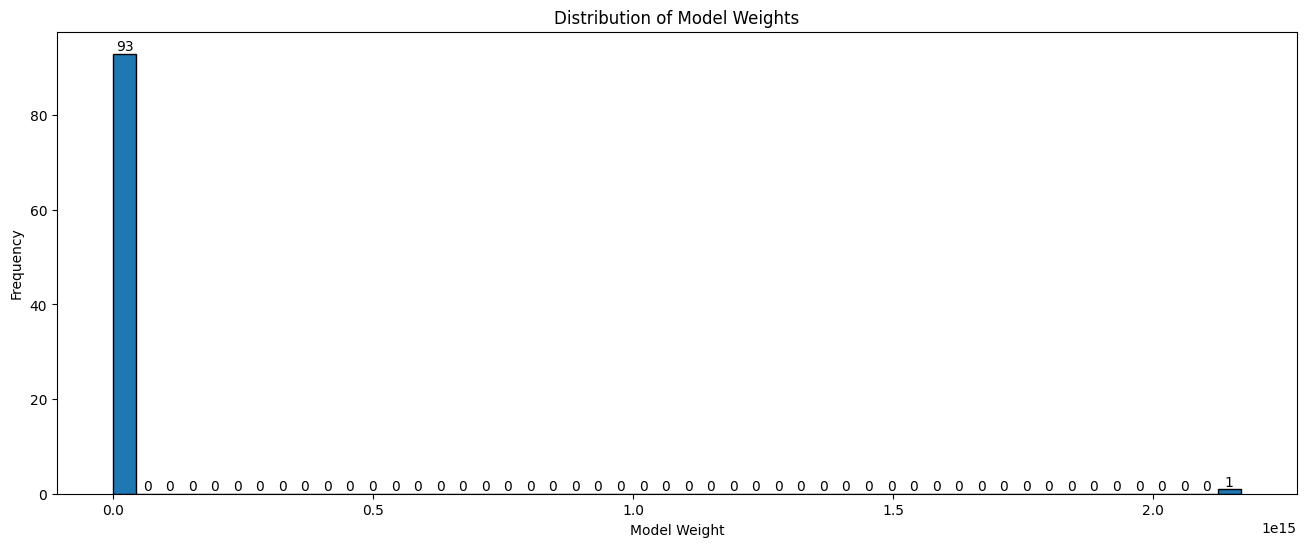

In [56]:
plt.figure(figsize=(16, 6))

counts, bins, patches = plt.hist(model.coef_, bins=50, edgecolor="black")

# Label each bin with the count
for count, bin_center in zip(counts, 0.5 * (bins[1:] + bins[:-1])):
    plt.text(bin_center, count, int(count), ha='center', va='bottom')

plt.title("Distribution of Model Weights")
plt.ylabel("Frequency")
plt.xlabel("Model Weight")
plt.show()

In [61]:
feature_names = [f'Neuron{i+1}' for i in range(94)]

coefficients = model.coef_

# Find the index of the largest coefficient
max_index = np.argmax(np.abs(coefficients))  # use np.abs to consider magnitude if weight could be negative
largest_feature = feature_names[max_index]
largest_weight = coefficients[max_index]

print("Feature with the largest weight:", largest_feature)
print("Largest weight:", largest_weight)

Feature with the largest weight: Neuron52
Largest weight: 2168668598353763.0


This is the neuron that is always 0, lets remove it and run again

In [62]:
X_scaled_cleaned = X_scaled.drop("Neuron52", axis=1)
X_scaled_cleaned.head()

,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,Neuron9,Neuron10,...,Neuron85,Neuron86,Neuron87,Neuron88,Neuron89,Neuron90,Neuron91,Neuron92,Neuron93,Neuron94
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.00,0.0,0.0,0.25,0.0,0.0,0.00,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.25,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.25,0.0,0.0,0.00,0.0,0.0,0.25,0.0,0.0


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_cleaned, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [64]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 1232.8408291151804
Root Mean Squared Error: 35.111833177935615
R^2 Score: 0.008022257983193337


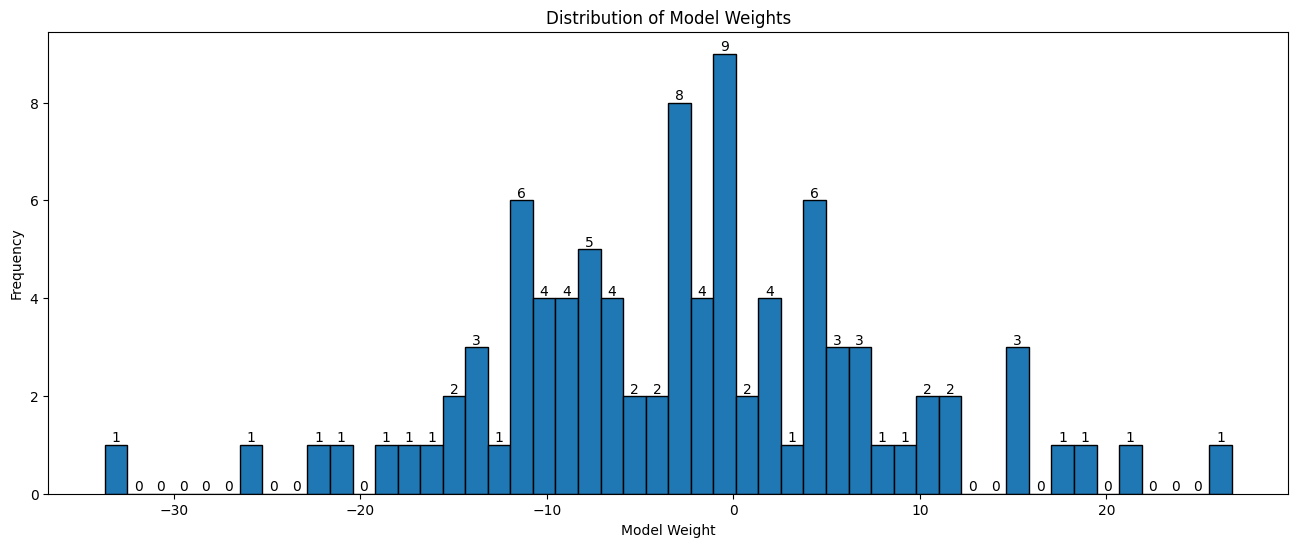

In [67]:
plt.figure(figsize=(16, 6))

counts, bins, patches = plt.hist(model.coef_, bins=50, edgecolor="black")

# Label each bin with the count
for count, bin_center in zip(counts, 0.5 * (bins[1:] + bins[:-1])):
    plt.text(bin_center, count, int(count), ha='center', va='bottom')

plt.title("Distribution of Model Weights")
plt.ylabel("Frequency")
plt.xlabel("Model Weight")
plt.show()

Lets look at which had the most positive and negative correlation/impact

In [69]:
feature_names.remove("Neuron52")

In [70]:
coefficients = model.coef_

feature_weights = list(zip(feature_names, coefficients))

sorted_features = sorted(feature_weights, key=lambda x: x[1], reverse=True)

In [71]:
n = 5  # Set your desired number of top positive weights
top_positive = sorted_features[:n]
top_negative = sorted_features[-n:]

print("Top positive weights:")
for feature, weight in top_positive:
    print(f"{feature}: {weight}")

print("\nTop negative weights:")
for feature, weight in top_negative:
    print(f"{feature}: {weight}")

Top positive weights:
Neuron46: 26.719676126197292
Neuron53: 21.459897855182614
Neuron47: 18.260936035717926
Neuron3: 17.245794029820807
Neuron57: 15.1494571040952

Top negative weights:
Neuron90: -18.30328239047901
Neuron44: -21.16044150485267
Neuron50: -21.847939525408663
Neuron69: -26.087930985564626
Neuron49: -33.714874322229356


Now lets see if maybe the effect of the neuron activation is time delayed on the accleration by shifting the acceleration up by n time blocks

Starting by shifting it up by 1:

In [72]:
y.head()

0    32.458898
1    26.869743
2    16.671890
3    18.344061
4    92.293873
Name: abs_acceleration, dtype: float64

In [76]:
y_shift_1 = y.shift(-1).iloc[:-1]
y_shift_1

0        26.869743
1        16.671890
2        18.344061
3        92.293873
4        45.638030
           ...    
59736    48.595239
59737    77.307587
59738    84.230776
59739    35.521116
59740    29.437056
Name: abs_acceleration, Length: 59741, dtype: float64

In [77]:
X_shift_1 = X_scaled_cleaned.iloc[:-1]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_shift_1, y_shift_1, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [79]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 1189.7411321889135
Root Mean Squared Error: 34.492624315770954
R^2 Score: 0.008917900284036051


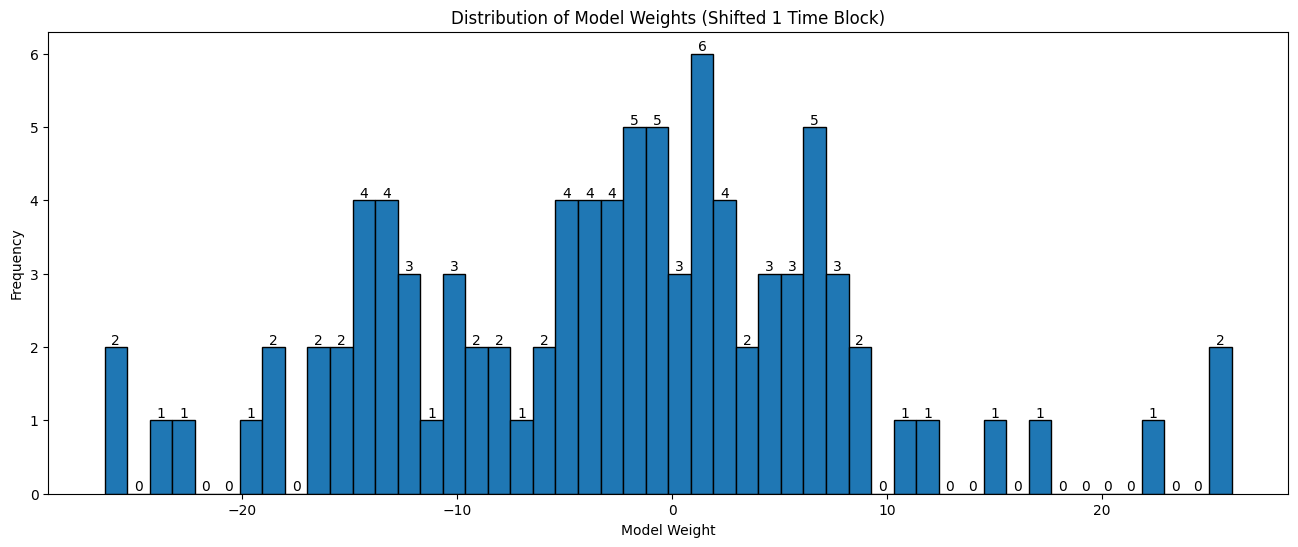

In [80]:
plt.figure(figsize=(16, 6))

counts, bins, patches = plt.hist(model.coef_, bins=50, edgecolor="black")

# Label each bin with the count
for count, bin_center in zip(counts, 0.5 * (bins[1:] + bins[:-1])):
    plt.text(bin_center, count, int(count), ha='center', va='bottom')

plt.title("Distribution of Model Weights (Shifted 1 Time Block)")
plt.ylabel("Frequency")
plt.xlabel("Model Weight")
plt.show()

In [81]:
coefficients = model.coef_
feature_weights = list(zip(feature_names, coefficients))
sorted_features = sorted(feature_weights, key=lambda x: x[1], reverse=True)

n = 5  # Set your desired number of top positive weights
top_positive = sorted_features[:n]
top_negative = sorted_features[-n:]

print("Top positive weights:")
for feature, weight in top_positive:
    print(f"{feature}: {weight}")

print("\nTop negative weights:")
for feature, weight in top_negative:
    print(f"{feature}: {weight}")

Top positive weights:
Neuron3: 26.03456567155362
Neuron46: 25.2146384844444
Neuron47: 22.407282185632475
Neuron27: 16.825729301498935
Neuron72: 14.665944661950443

Top negative weights:
Neuron65: -19.491613887562277
Neuron25: -22.339832949818707
Neuron62: -24.08736903037115
Neuron69: -25.659900884363946
Neuron58: -26.39770805752068


While our top positive and negative weights have changed, our accuracy has not moved much. Lets try some larger time shifts:

In [82]:
t = 2
y_shift_2 = y.shift(-1).iloc[:-t]
X_shift_2 = X_scaled_cleaned.iloc[:-t]
X_train, X_test, y_train, y_test = train_test_split(X_shift_2, y_shift_2, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 1231.2336689486538
Root Mean Squared Error: 35.08893941042752
R^2 Score: 0.0046559240874241015


In [83]:
t = 3
y_shift_3 = y.shift(-1).iloc[:-t]
X_shift_3 = X_scaled_cleaned.iloc[:-t]
X_train, X_test, y_train, y_test = train_test_split(X_shift_3, y_shift_3, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 1177.109180884308
Root Mean Squared Error: 34.309024773145445
R^2 Score: 0.007047808598312888


In [84]:
t = 4
y_shift_4 = y.shift(-1).iloc[:-t]
X_shift_4 = X_scaled_cleaned.iloc[:-t]
X_train, X_test, y_train, y_test = train_test_split(X_shift_4, y_shift_4, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 1233.721357750203
Root Mean Squared Error: 35.12436985556044
R^2 Score: 0.0032064456038999323


In [85]:
t = 5
y_shift_5 = y.shift(-1).iloc[:-t]
X_shift_5 = X_scaled_cleaned.iloc[:-t]
X_train, X_test, y_train, y_test = train_test_split(X_shift_5, y_shift_5, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 1197.057204682314
Root Mean Squared Error: 34.5985144866411
R^2 Score: 0.00784475385270389


In [86]:
t = 7
y_shift_7 = y.shift(-1).iloc[:-t]
X_shift_7 = X_scaled_cleaned.iloc[:-t]
X_train, X_test, y_train, y_test = train_test_split(X_shift_7, y_shift_7, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 1189.6562950122802
Root Mean Squared Error: 34.491394506634265
R^2 Score: 0.004459007169465123


It really doesn't seem to have much of an effect, lets try some large shifts to reinforce that this seems to be random

In [87]:
t = 15
y_shift_15 = y.shift(-1).iloc[:-t]
X_shift_15 = X_scaled_cleaned.iloc[:-t]
X_train, X_test, y_train, y_test = train_test_split(X_shift_15, y_shift_15, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 1172.002230570609
Root Mean Squared Error: 34.23451811506347
R^2 Score: 0.008041115639141005


In [88]:
t = 50
y_shift_50 = y.shift(-1).iloc[:-t]
X_shift_50 = X_scaled_cleaned.iloc[:-t]
X_train, X_test, y_train, y_test = train_test_split(X_shift_50, y_shift_50, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 1202.4857598134415
Root Mean Squared Error: 34.67687644257253
R^2 Score: 0.005727636898180677


Yup, seems to be the same!